#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import to_categorical
y_label_train_OneHot = to_categorical(y_label_train)
y_label_test_OneHot = to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

In [8]:
#卷積層1

In [9]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [10]:
model.add(Dropout(rate=0.25))

In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
#卷積層2與池化層2

In [13]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [14]:
model.add(Dropout(0.25))

In [15]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [17]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [18]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [19]:
model.add(Dense(10, activation='softmax'))

In [20]:
#檢查model 的STACK
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                   

# 載入之前訓練的模型

In [21]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [22]:
model_mse = model
model_bi = model
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model_mse.compile(loss='mean_squared_error', optimizer='Adam', metrics=['accuracy'])
model_bi.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [23]:
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot,
                          validation_split=0.25,
                          epochs=10, batch_size=128, verbose=1)   

train_history_mse = model_mse.fit(x_img_train_normalize, y_label_train_OneHot,
                                  validation_split=0.25,
                                  epochs=10, batch_size=128, verbose=1)  

train_history_bi = model_bi.fit(x_img_train_normalize, y_label_train_OneHot,
                                validation_split=0.25,
                                epochs=10, batch_size=128, verbose=1) 

Epoch 1/10


293/293 [==============================] - 17s 55ms/step - loss: 0.2480 - accuracy: 0.4216 - val_loss: 0.2323 - val_accuracy: 0.5374
Epoch 2/10
293/293 [==============================] - 16s 55ms/step - loss: 0.1963 - accuracy: 0.5666 - val_loss: 0.1979 - val_accuracy: 0.5989
Epoch 3/10
293/293 [==============================] - 16s 55ms/step - loss: 0.1750 - accuracy: 0.6237 - val_loss: 0.1822 - val_accuracy: 0.6535
Epoch 4/10
293/293 [==============================] - 16s 55ms/step - loss: 0.1595 - accuracy: 0.6589 - val_loss: 0.1713 - val_accuracy: 0.6702
Epoch 5/10
293/293 [==============================] - 27s 93ms/step - loss: 0.1489 - accuracy: 0.6877 - val_loss: 0.1656 - val_accuracy: 0.6791
Epoch 6/10
293/293 [==============================] - 20s 67ms/step - loss: 0.1380 - accuracy: 0.7153 - val_loss: 0.1523 - val_accuracy: 0.7019
Epoch 7/10
293/293 [==============================] - 17s 59ms/step - loss: 0.1298 - accuracy: 0.7381 - val_loss: 0.1468 - val_accurac

In [24]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

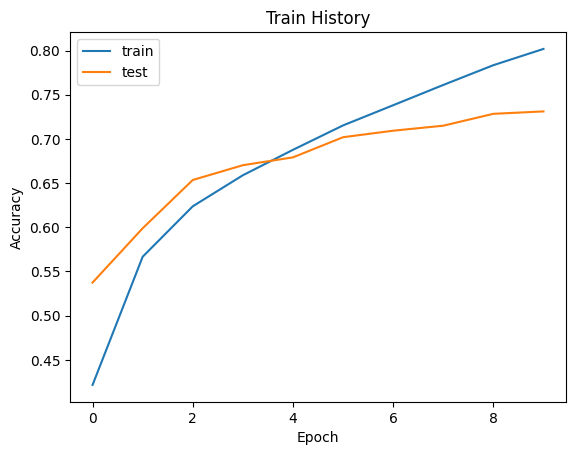

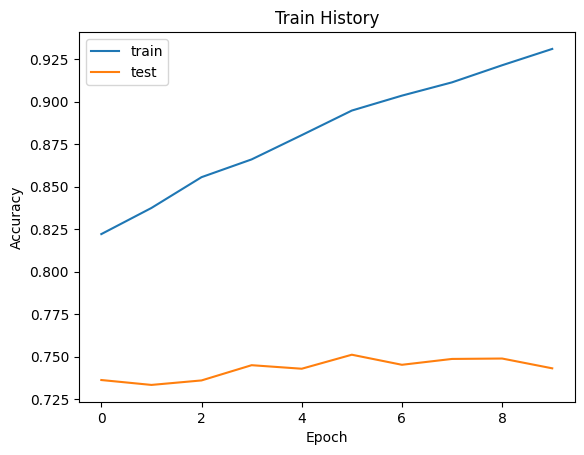

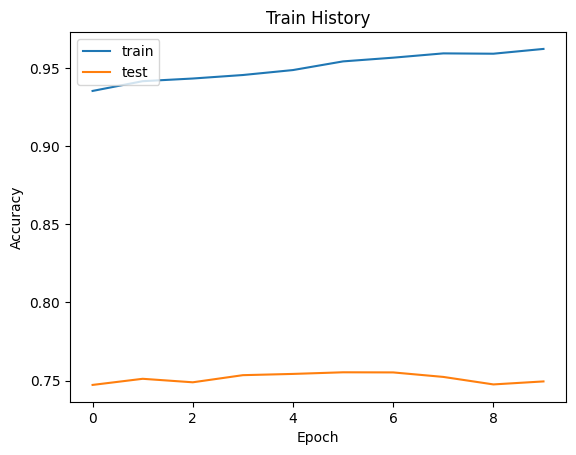

In [25]:
show_train_history(train_history,"accuracy","val_accuracy")
show_train_history(train_history_mse,"accuracy","val_accuracy")
show_train_history(train_history_bi,"accuracy","val_accuracy")

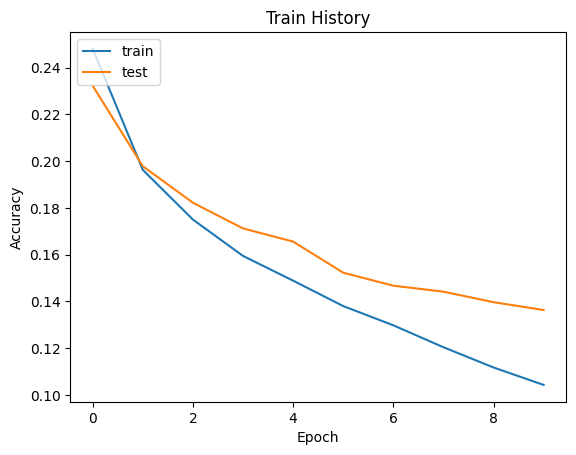

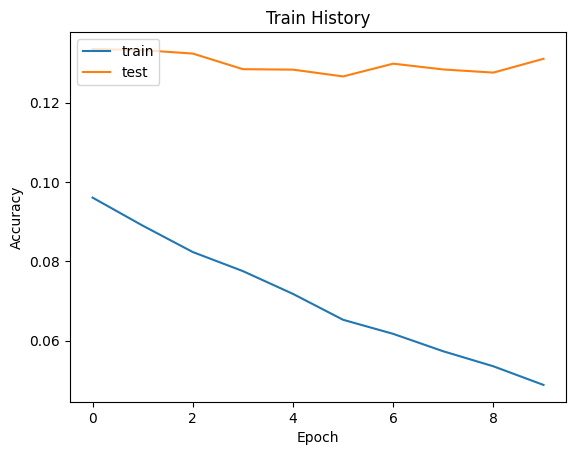

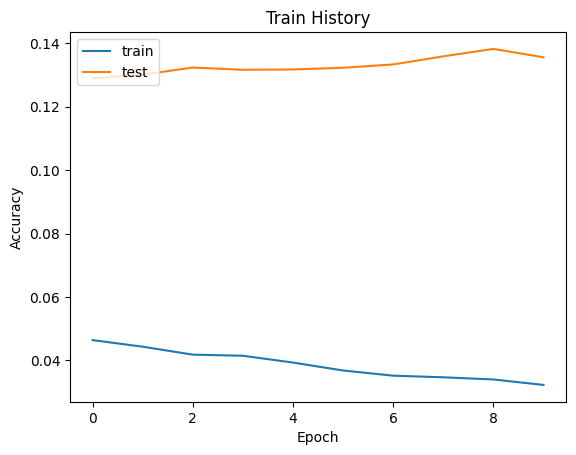

In [26]:
show_train_history(train_history,"loss","val_loss")
show_train_history(train_history_mse,"loss","val_loss")
show_train_history(train_history_bi,"loss","val_loss")